**Improvement on THIRD code file- increased Batch size and epochs and incremental model.fit()</br> Observation-Model validation accuracy in first model.fit() reached to 99.33% while in second model.fit() validation accuracy increased to 99.49%**

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
# Importing Keras library
import keras

Using TensorFlow backend.


In [0]:
# Import numpy which is fundamental package for scientific computing in python
import numpy as np
# Using sequential model from models available in keras
from keras.models import Sequential
# Importing keras layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# Importing utilities which transform data
from keras.utils import np_utils
# Importing mnist from dataset for image processing
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading train and test data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


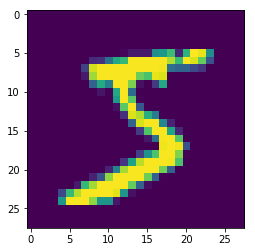

In [4]:
# Printing train data shape
print (X_train.shape)
# Matplotlib is used for ploting graph
from matplotlib import pyplot as plt
# Ploting image under code cell
%matplotlib inline
# Ploted image of train[0] from train data set
plt.imshow(X_train[0])

In [0]:
# Reshaping for train and test data for processing
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Conversion of train and test data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# output of train data array and its data type
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Output of train data set array of dimension 10
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# Using Activation function from keras layers
from keras.layers import Activation, BatchNormalization
# Defining sequential model
model = Sequential()
# Using convolution and Max Pooling operation on input image

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(12, 1, 1, activation='relu'))#11
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(12, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(24, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 7))

# using flatten to convert multidimension array into 1-d array
model.add(Flatten())
# Using softmax activation function for probability distribution
model.add(Activation('softmax'))
# Print Model summary 
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_16 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 12)        1308      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 24)        2616      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`


In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# fit model for training data
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.2215 - acc: 0.9287 - val_loss: 0.0556 - val_acc: 0.9810
Epoch 2/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0717 - acc: 0.9778 - val_loss: 0.0612 - val_acc: 0.9789
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0561 - acc: 0.9826 - val_loss: 0.0364 - val_acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0358 - val_acc: 0.9871
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0330 - val_acc: 0.9879
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0395 - acc: 0.9876 - val_loss: 0.0270 - val_acc: 0.9901
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.

In [22]:
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.0150 - acc: 0.9947 - val_loss: 0.0180 - val_acc: 0.9939
Epoch 2/30
60000/60000 [==============================] - 6s 106us/step - loss: 0.0139 - acc: 0.9952 - val_loss: 0.0195 - val_acc: 0.9928
Epoch 3/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.0129 - acc: 0.9956 - val_loss: 0.0188 - val_acc: 0.9930
Epoch 4/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0201 - val_acc: 0.9930
Epoch 5/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0217 - val_acc: 0.9931
Epoch 6/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0207 - val_acc: 0.9936
Epoch 7/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.0135 - acc: 0.9955 - val_loss: 0.0204 - 

In [23]:
# evaluating and printing model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.02593083482312345
Accuracy: 0.993
